# Document Preparation for NLP

## Applications (Open Source) Recommended

1. Artifex's Ghostscript - extracting text from text PDF
2. ImageMagic's Magick - extracting image from scanned PDF
3. Google's Tesseract - OCR of scanned/image captured text
4. NLTK Toolkit - Syntax Analysis/Parts of Speech

### Github Account

https://github.com/andrewferlitsch/epipog-nlp

### Ghostscript

1. Download link : https://www.ghostscript.com/download/gsdnld.html
        
    Use the Free Version<br/>

    I have a 64bit Windows laptop, so I am using this version: Ghostscript 9.23 for Windows (64 bit).<br/><br/>

2. Check if path to the program is in your PATH variable. 

    A. Open a command shell.<br/>
    B. Type gswin64c in the command line.<br/>
    C. If not found, add it to your path variable. For me, it is: C:\Program Files\gs\gs9.23\bin<br/>




### Magick

1. Download Link: https://www.imagemagick.org/script/download.php

    Use the static version (dynamic is for DLL inclusion).<br/>
    
    Use the 8bits per pixel version.<br/>
    
    I have a 64bit Windows laptop, so I am using this version: ImageMagick-7.0.8-1-Q8-x64-static.exe<br/><br/>
    
2. Check if path to the program is in your PATH variable.
 
    A. Open a command shell.<br/>
    B. Type magick in the command line.<br/>
    C. If not found, add it to your path variable. For me, it is: C:\Program Files\ImageMagic-7.0.8-Q8

### Tesseract

1. Download Link: https://github.com/tesseract-ocr/tesseract/wiki/Downloads

    A. Make sure to add the English Language training data to the tessdata subdirectory where tesseract is installed.<br/><br/>

2. Check if path to program is in your PATH variable:

    A. Open a command shell.<br/>
    B. Type tesseract in the command line.<br/>
    C. If not found, add it your path variable. For me, it is C:\Program Files\tesseract-Win64\<br/>
    
3. Install the English Training Data files as: C:\Program Files\tesseract-Win64\tessdata

    You can get a copy from my github account.

### NLTK Toolkit

1. Documentation: http://www.nltk.org/


2. Install NLTK using pip:

    pip install nltk


### Ghostscript Example: Extracting Text from Text PDF

Let's try some examples with using Ghostscript and PDF documents.

First, let's get the number of pages in the PDF. (yes, ghostscript's options are somewhat cryptic). We will do it on a 140 page file.

In [1]:
import os
os.chdir("../")
!cd

C:\Users\'\Desktop\epipog-nlp


In [2]:

!gswin64c  -dBATCH -q -dNODISPLAY -c "("plan/afspa.pdf") (r) file runpdfbegin pdfpagecount = quit"

140


Let's now try to split a PDF into individual pages. In the command below, we tell Ghostscript to split out page 1. We could
do this in a for loop and extract each page one at a time.

Note that we set the output DEVICE to pdfwrite. This is the command to Ghostscript to output a PDF file.

In [3]:
!gswin64c -dBATCH -dNOPAUSE -sOutputFile="plan/afspa1.pdf" -sPageList=1 -sDEVICE=pdfwrite "plan/afspa.pdf"

GPL Ghostscript 9.23 (2018-03-21)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1.
Page 1


GPL Ghostscript 9.23: ERROR: A pdfmark destination page 140 points beyond the last page 1.


Let's look at what is inside of the first PDF page. Is it text, a scanned image, a mix of text and images? We can guessimate this by looking at the PDF Resource directive inside of the PDF file.

    /Text   -> Text
    /ImageB -> B&W Image
    /ImageC -> Color Image
    /ImageI -> Indexed Image

We will do this using Epipog's PDFResource object. We will also set the debug flag to output the version and PDF resources found to the standard output.

In [4]:
# Import Epipog PDFResource class from the pdf_res module
from pdf_res import PDFResource

In [5]:
res = PDFResource("plan/afspa1.pdf", debug=True)

PDF Version 1.5
resources  /ImageC /ImageI /Text]



The PDFResource properties text and image will tell us if the PDF file contains text and/or images respectively.

In [6]:
# Let's now check whether the page is a text PDF, scanned PDF, or mix text and images.
print(res.text)
print(res.image)

True
True


Let's now extract the text from this single page PDF file using Ghostscript.

Note that we set the output DEVICE to txtwrite. This is the command to Ghostscript to output a PDF file.

In [7]:
!gswin64c -dBATCH -dNOPAUSE -sOutputFile="plan/afspa1.txt" -sPageList=1 -sDEVICE=txtwrite "plan/afspa1.pdf"

GPL Ghostscript 9.23 (2018-03-21)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1.
Page 1


In [8]:
!dir plan\afspa*.pdf

 Volume in drive C is OS
 Volume Serial Number is 7651-3039

 Directory of C:\Users\'\Desktop\epipog-nlp\plan

06/10/2018  09:29 PM         1,787,053 afspa.pdf
07/04/2018  02:28 PM           261,236 afspa1.pdf
               2 File(s)      2,048,289 bytes
               0 Dir(s)  269,474,099,200 bytes free


Let's try another PDF document, which will have an unexpected result - which I will explain.

In [9]:
# Split page 1 from the PDF file
!gswin64c -dBATCH -dNOPAUSE -sOutputFile="plan/il1.pdf" -sPageList=1 -sDEVICE=pdfwrite "plan/il.pdf"

# Extract the text from the PDF page
!gswin64c -dBATCH -dNOPAUSE -sOutputFile="plan/il1.txt" -sPageList=1 -sDEVICE=txtwrite "plan/il1.pdf"

GPL Ghostscript 9.23 (2018-03-21)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1.
Page 1
GPL Ghostscript 9.23 (2018-03-21)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1.
Page 1


Let's view the contents of the extracted text file.

OMG. It's just a lot of unprintable ASCII control characters. What happened?

The PDF Resource directive is just a hint. It doesn't mean that it is correct. So, in this case, this is really a scanned PDF.

In [10]:
!notepad.exe plan\\il1.txt

### Ghostscript/Tesseract Example:  Extract Text from Scanned PDF example

So the il.pdf file appears to be a scanned PDF. So, let's extract the scanned page as a PNG image using Ghostscript.

This time, we will set the output device to a grayscale PNG image. Ghostscript actually renders an image (vs. merely extract). This gives us an opportunity to tell Ghostscript the resolution of the generated image, which will affect the OCR quality. I good rule of thumb is 300dpi. I've found 72 and 150dpi give poor OCR, 200 is okay on many things, but 300 generally is good for all cases.


In [11]:
# Extract the scanned image from the PDF page
!gswin64c -dBATCH -dNOPAUSE -sOutputFile="plan/il1.png" -sPageList=1 -sDEVICE=pnggray  -r300 "plan/il1.pdf"

GPL Ghostscript 9.23 (2018-03-21)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1.
Page 1


Now we will use Tesseract to extract the text from the PNG image.

In [12]:
!tesseract "plan/il1.png" "plan/il1"

Tesseract Open Source OCR Engine v3.05.01 with Leptonica


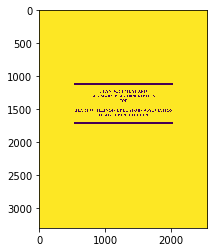

In [13]:
import matplotlib.pyplot as plt

# This line is specific to python notebooks (not python). 
# It causes plots to automatically be rendered (displayed) without issuing a show command.
%matplotlib inline

# Importing OpenCV
import cv2
image = cv2.imread("plan/il1.png", 0)
plt.imshow(image)

# Automated PDF, Fax, Image Capture Text Extraction with Epipog

Let's now automate all of the above and MORE. We will be using the SPLITTER component in my Epipog module.

Steps:
1. Import the document module
2. Create a Document object
3. Pass a PDF (text or scanned), Facsimile (TIFF) or image captured document to the Document object.
4. Wait for the results :)

In [14]:
# import Document and Page from the document module
from document import Document, Page

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\'\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\'\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Document Object

The initializer (constructor) takes the following arguments:<br/>

        document - path to the document
        dir      - directory where to store extracted pages and text
        ehandler - function to invoke when processing is completed in asynchronous mode
        config   - configuration settings for SYNTAX module


In [16]:
doc = Document("plan/nc.pdf", "plan/nc")

Ok, we are done! Let's look at a page, like page 105.

Wow, that's the foreign language translation page - see how it handles other (non-latin) character sets.

In [18]:
# Use the len() operator to find out how many pages are in the document
len(doc)

105

## Page Object

Let's now dive deeper. When the document was processed, each page was put into a Page object. Here are some things we can do:

1. Walk thru each page sequentially as an array index.<br/>
2. See the original text from the page.<br/>
3. See the "default" NLP preprocessing of the text on the page (which can be modified with config settings).<br/>


In [20]:
# Let's take a look at one of the pages
pages = doc.pages
# total number of pages
print(len(pages))
# Last page in the document
pages[104]

105


In [21]:
# Let's look at the text for that page (page 105)
page = pages[104]
page.text

'Legal Notices \n         Laotian    ໂປດຊາບ:  ຖ້າວ່າ  ທ່ານເວົ້າພາສາ  ລາວ,  ການບໍລິການຊ່ວຍ\n                    ເຫຼືອດ້ານພາສາ, ໂດຍບໍ່ເສັຽຄ່າ, ແມ່ນມີພ້ອມໃຫ້ທ່ານ. \n                    ໂທຣ 919-814-4400. \n         Japanese   注意事項：日本語を話される場合、無料の言語支援をご利用いただけます。919-814-\n                    4400. \n                           Notice of Grandfather Status \n     The State Health Plan believes the 70/30 Plan is a “grandfathered health plan” under the Patient Protection \n     and Affordable Care Act (the Affordable Care Act). As permitted by the Affordable Care Act, a grandfathered \n     health plan can preserve certain basic health coverage that was already in effect when that law was enacted. \n     Being a grandfathered health plan means that your plan may not include certain consumer protections of the \n     Affordable Care Act that apply to other plans, for example, the requirement for the provision of preventive \n     health services without any cost sharing. However, grandfathered hea

In [22]:
# Let's look at the default NLP preprocessing of the text (stemming, stopword removal, punct removal)
page.words


[{'tag': 0, 'word': 'legal'},
 {'tag': 0, 'word': 'ໂປດຊາບ'},
 {'tag': 0, 'word': 'ຖ'},
 {'tag': 0, 'word': 'າວ'},
 {'tag': 0, 'word': 'າ'},
 {'tag': 0, 'word': 'ທ'},
 {'tag': 0, 'word': 'ານເວ'},
 {'tag': 0, 'word': 'າພາສາ'},
 {'tag': 0, 'word': 'ລາວ'},
 {'tag': 0, 'word': 'ການບ'},
 {'tag': 0, 'word': 'ລ'},
 {'tag': 0, 'word': 'ການຊ'},
 {'tag': 0, 'word': 'ວຍ'},
 {'tag': 0, 'word': 'ເຫ'},
 {'tag': 0, 'word': 'ອດ'},
 {'tag': 0, 'word': 'ານພາສາ'},
 {'tag': 0, 'word': 'ໂດຍບ'},
 {'tag': 0, 'word': 'ເສ'},
 {'tag': 0, 'word': 'ຽຄ'},
 {'tag': 0, 'word': 'າ'},
 {'tag': 0, 'word': 'ແມ'},
 {'tag': 0, 'word': 'ນມ'},
 {'tag': 0, 'word': 'ພ'},
 {'tag': 0, 'word': 'ອມໃຫ'},
 {'tag': 0, 'word': 'ທ'},
 {'tag': 0, 'word': 'ານ'},
 {'tag': 0, 'word': 'ໂທຣ'},
 {'tag': 0, 'word': 'japanese'},
 {'tag': 0, 'word': '注意事項'},
 {'tag': 0, 'word': '日本語を話される場合'},
 {'tag': 0, 'word': '無料の言語支援をご利用いただけます'},
 {'tag': 0, 'word': 'notice'},
 {'tag': 0, 'word': 'believe'},
 {'tag': 0, 'word': 'health'},
 {'tag': 0, 'word':

We can see that some words appear a lot, like preventive, health and protection. Let's get information on the distribution of words in the page. There are two properties we can use for this purpose:

    freqDist - count of the number of occurrences of each word
    termFreq - percentage the word appears on the page (TF -> Term Frequency)

In [23]:
# Let's see the frequency distribution (word counts) for the page
page.freqDist

[('plan', 10),
 ('health', 8),
 ('protection', 4),
 ('apply', 3),
 ('share', 2),
 ('cost', 2),
 ('preventive', 2),
 ('service', 2),
 ('example', 2),
 ('ທ', 2),
 ('າ', 2),
 ('consumer', 2),
 ('benefit', 2),
 ('າພາສາ', 1),
 ('ໂທຣ', 1),
 ('ຖ', 1),
 ('contact', 1),
 ('ອດ', 1),
 ('provide', 1),
 ('requirement', 1),
 ('permit', 1),
 ('change', 1),
 ('ໂດຍບ', 1),
 ('healthcare', 1),
 ('u', 1),
 ('ລ', 1),
 ('japanese', 1),
 ('believe', 1),
 ('無料の言語支援をご利用いただけます', 1),
 ('s', 1),
 ('notice', 1),
 ('lifetime', 1),
 ('base', 1),
 ('ວຍ', 1),
 ('effect', 1),
 ('注意事項', 1),
 ('coverage', 1),
 ('direct', 1),
 ('ລາວ', 1),
 ('legal', 1),
 ('ການຊ', 1),
 ('location', 1),
 ('www', 1),
 ('provision', 1),
 ('question', 1),
 ('ຽຄ', 1),
 ('mean', 1),
 ('elimination', 1),
 ('ນມ', 1),
 ('າວ', 1),
 ('limit', 1),
 ('preserve', 1),
 ('enact', 1),
 ('ອມໃຫ', 1),
 ('continue', 1),
 ('status', 1),
 ('gov', 1),
 ('ພ', 1),
 ('law', 1),
 ('ເຫ', 1),
 ('ານ', 1),
 ('ານພາສາ', 1),
 ('ເສ', 1),
 ('ແມ', 1),
 ('ານເວ', 1),
 ('ໂປດຊາບ',

In [24]:
# Let's see the term frequency (TF)
page.termFreq

[('plan', 0.0970873786407767),
 ('health', 0.07766990291262135),
 ('protection', 0.038834951456310676),
 ('apply', 0.02912621359223301),
 ('share', 0.019417475728155338),
 ('cost', 0.019417475728155338),
 ('preventive', 0.019417475728155338),
 ('service', 0.019417475728155338),
 ('example', 0.019417475728155338),
 ('ທ', 0.019417475728155338),
 ('າ', 0.019417475728155338),
 ('consumer', 0.019417475728155338),
 ('benefit', 0.019417475728155338),
 ('າພາສາ', 0.009708737864077669),
 ('ໂທຣ', 0.009708737864077669),
 ('ຖ', 0.009708737864077669),
 ('contact', 0.009708737864077669),
 ('ອດ', 0.009708737864077669),
 ('provide', 0.009708737864077669),
 ('requirement', 0.009708737864077669),
 ('permit', 0.009708737864077669),
 ('change', 0.009708737864077669),
 ('ໂດຍບ', 0.009708737864077669),
 ('healthcare', 0.009708737864077669),
 ('u', 0.009708737864077669),
 ('ລ', 0.009708737864077669),
 ('japanese', 0.009708737864077669),
 ('believe', 0.009708737864077669),
 ('無料の言語支援をご利用いただけます', 0.0097087378640

## Document Object (Advanced)

Let's look at more advanced features of the Document object.

1. Word Count and Term Frequency
2. Save and Restore
3. Asychronous Processing of Documents

### Frequency Distribution

Let's look at a frequency distribution (word count) for the whole document. Note that if we look at just the top 10 word counts (after removing stopwords), it is very clear what the document is about: service, benefit, cover, health, medical, care, coverage, ...

If we look at the top 25 word counts, we can see secondary classification indicators, like: plan, medication, treatment, deductible, eligible, dependent, hospital, claim, authorization, prescription and limit.

HINT: It's a Healthcare Benefit Plan.

In [25]:
doc.freqDist

[('service', 627),
 ('provide', 579),
 ('benefit', 460),
 ('cover', 331),
 ('health', 321),
 ('care', 302),
 ('medical', 214),
 ('network', 212),
 ('coverage', 207),
 ('receive', 201),
 ('information', 192),
 ('medication', 177),
 ('s', 158),
 ('plan', 157),
 ('requ', 145),
 ('treatment', 136),
 ('certification', 135),
 ('review', 130),
 ('deductible', 129),
 ('representative', 112),
 ('amount', 112),
 ('must', 110),
 ('eligible', 108),
 ('dependent', 107),
 ('prior', 106),
 ('condition', 102),
 ('time', 101),
 ('hospital', 99),
 ('claim', 96),
 ('authorization', 93),
 ('prescription', 92),
 ('supp', 92),
 ('limit', 88),
 ('available', 87),
 ('facility', 86),
 ('therapy', 83),
 ('decision', 81),
 ('program', 80),
 ('charge', 78),
 ('employee', 77),
 ('list', 76),
 ('emergency', 75),
 ('call', 74),
 ('bcbsnc', 72),
 ('period', 72),
 ('requir', 71),
 ('visit', 70),
 ('level', 70),
 ('pay', 70),
 ('license', 67),
 ('apply', 66),
 ('require', 65),
 ('responsible', 62),
 ('www', 62),
 ('dat

### (Re) Load

When a Document object is created, the individual PDF pages, text extaction and NLP analysis are stored. 

The document can then be subsequently reloaded from storage without reprocessing.

In [26]:
# Let's first delete the Document object
doc = None
doc

In [27]:
# Let's reload the document from storage.
doc = Document()
doc.load("plan/nc.pdf", "plan/nc")

Let's show some examples of how the document was reconstructed from memory.

In [28]:
# Document Name, Number of Pages
print(doc.document)
print(len(doc))

plan/nc.pdf
105


In [29]:
# Let's print text from the last page
page = doc[104]
page.text

'                                                                               Legal Notices \n                     Notice of Privacy Practices \n                                                               Original Effective Date: April 14th, 2003 \n                                                           Revised Effective Date: September 23rd, 2013 \n                                                             Revised Effective Date: January 22nd, 2018 \n                                                                                           \n                                      Your Information. Your Rights. Our Responsibilities. \n            \n               THIS NOTICE DESCRIBES HOW MEDICAL INFORMATION ABOUT YOU MAY \n            BE USED AND DISCLOSED BY THE PLAN AND HOW YOU CAN GET ACCESS TO \n                                                                   THIS INFORMATION. \n                                                        PLEASE REVIEW IT CAREFULLY. \n      

In [30]:
# Let's print the word (count) frequency distribution
doc.freqDist

[('service', 627),
 ('provide', 579),
 ('benefit', 460),
 ('cover', 331),
 ('health', 321),
 ('care', 302),
 ('medical', 214),
 ('network', 212),
 ('coverage', 207),
 ('receive', 201),
 ('information', 192),
 ('medication', 177),
 ('s', 158),
 ('plan', 157),
 ('requ', 145),
 ('treatment', 136),
 ('certification', 135),
 ('review', 130),
 ('deductible', 129),
 ('representative', 112),
 ('amount', 112),
 ('must', 110),
 ('eligible', 108),
 ('dependent', 107),
 ('prior', 106),
 ('condition', 102),
 ('time', 101),
 ('hospital', 99),
 ('claim', 96),
 ('authorization', 93),
 ('prescription', 92),
 ('supp', 92),
 ('limit', 88),
 ('available', 87),
 ('facility', 86),
 ('therapy', 83),
 ('decision', 81),
 ('program', 80),
 ('charge', 78),
 ('employee', 77),
 ('list', 76),
 ('emergency', 75),
 ('call', 74),
 ('bcbsnc', 72),
 ('period', 72),
 ('requir', 71),
 ('visit', 70),
 ('level', 70),
 ('pay', 70),
 ('license', 67),
 ('apply', 66),
 ('require', 65),
 ('www', 62),
 ('date', 62),
 ('responsibl

### Async Execution

Let's say you have PDF files arriving for processing in real-time from various sources. The ehandler option provides asynchronous processing of documents. When this option is specified, the document is processed on an independent process thread, and when complete the specified event handler is called.

In [31]:
def done(document):
    print("EVENT HANDLER: done")
    
doc = Document("crash_2015.pdf", ehandler=done)

EVENT HANDLER: done


Let's get a frequency distribution for this document. BTW, it is a 2015 State of Oregon table of crash statistics (single page) from a multi-page report. Note how the top ten words (after stopword removal) indicate what the document is about: serious, injury, fatal, crash, highway, death.

In [32]:
doc.freqDist

[('combine', 7),
 ('serious', 5),
 ('injury', 4),
 ('fatal', 4),
 ('inj', 4),
 ('crash', 3),
 ('system', 3),
 ('rate', 2),
 ('vmt', 2),
 ('highway', 2),
 ('miles', 2),
 ('death', 2),
 ('jurisdiction', 1),
 ('drivinevent', 1),
 ('v', 1),
 ('s', 1),
 ('continue', 1),
 ('capable', 1),
 ('wjury', 1),
 ('injuriula', 1),
 ('data', 1),
 ('annual', 1),
 ('sustain', 1),
 ('classification', 1),
 ('injuries', 1),
 ('pralk', 1),
 ('nog', 1),
 ('crashes', 1),
 ('prior', 1),
 ('casualty', 1),
 ('functional', 1),
 ('person', 1),
 ('rmal', 1),
 ('inon', 1),
 ('list', 1),
 ('es', 1),
 ('activity', 1),
 ('vehicle', 1),
 ('table', 1),
 ('result', 1),
 ('total', 1),
 ('deate', 1),
 ('and', 1)]

## END OF SESSION 1